In [174]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('dados_tratados.xlsx')

# Produtos com Maior Desconto

In [175]:
# Remove o % e converte para int
df['Desconto'] = df['Desconto'].astype(str).str.replace("%", "", regex=False).astype(int)

# Filtra os descontos menores ou iguais a -20
df_maiores_descontos = df[df['Desconto'] <= -20][['Nome', 'Desconto']]

# Renomeia a coluna
df_maiores_descontos = df_maiores_descontos.rename(columns={'Desconto': 'Maiores_Descontos'})

# Ordena de forma decrescente (do maior desconto para o menor)
df_maiores_descontos = df_maiores_descontos.sort_values(by='Maiores_Descontos').reset_index(drop=True)

# Exibe o resultado
print(df_maiores_descontos)


                                                 Nome  Maiores_Descontos
0   Headset Trust Over-Ear, Conexão USB, Driver 40...                -46
1   Teclado Slim Multi, USB, ABNT2, Resistente Águ...                -39
2   Pen Drive 128GB Kingston DataTraveler Exodia, ...                -33
3   Kit Multi Teclado e Mouse Sem Fio Slim, 1200 D...                -27
4   Hub F3 Adaptador Type-c 8 em 1, para HDMI, Typ...                -26
5   Base com Cooler para Notebook Rise Mode, Galax...                -25
6   Suporte de Mesa Articulado para Monitor de 17"...                -25
7   Suporte Ergonômico Multiarticulado de Mesa par...                -24
8   Teclado Mecânico Sem Fio Logitech POP Keys, Sw...                -23
9   Mouse sem fio Logitech M170 com Design Ambides...                -21
10  Mouse Multi Com Fio 1600Dpi USB 6 Botões Preto...                -21
11  Mouse Sem Fio Logitech Signature M650, 2000 DP...                -20
12  Cabo Fonte Sleeved Rise Mode Preto e Branco - .

# Média de Descontos por Categoria

In [176]:
# Agrupar por categoria e calcular a média dos descontos
media_descontos_por_categoria = df.groupby('Categoria')['Desconto'].mean().reset_index()

# Ordenar da maior para a menor média
media_descontos_por_categoria = media_descontos_por_categoria.sort_values(by='Desconto').reset_index(drop=True)
media_descontos_por_categoria['Desconto'] = media_descontos_por_categoria['Desconto'].round(1)

display(media_descontos_por_categoria)

,Categoria,Desconto
0,Adaptador,-26.0
1,Pen Drive,-23.0
2,Base Com Cooler,-22.0
3,Suporte De Mesa,-20.5
4,Desconhecida,-14.3
5,Cabo Fonte,-13.2
6,Mouse,-6.6
7,Mesa Digitalizadora,-5.7
8,Teclado,-4.9
9,Headset,-4.7


# Popularidade por Categoria

In [177]:
# Cria a coluna 'Quantidade' com base na soma de valores de cada categoria
popularidade_categoria = df['Categoria'].value_counts().reset_index()
popularidade_categoria.columns = ['Categoria', 'Quantidade']
popularidade_categoria = popularidade_categoria.sort_values(by='Quantidade', ascending=False).reset_index(drop=True)

print("Popularidade por Categoria:")
display(popularidade_categoria)

Popularidade por Categoria:


,Categoria,Quantidade
0,Mouse,40
1,Headset,32
2,Teclado,17
3,Gabinete,11
4,Webcam,9
5,Mesa Digitalizadora,6
6,Cabo Fonte,4
7,Desconhecida,3
8,Pen Drive,2
9,Mochila,2


# Preço Médio por Categoria

In [178]:
# Ajustar corretamente o campo de preço
df['Preco'] = df['Preco'].astype(str)
df['Preco'] = df['Preco'].str.replace('R$', '', regex=False)
df['Preco'] = df['Preco'].str.strip()
df['Preco'] = df['Preco'].str.replace(',', '.', regex=False)

# Agora converte para float
df['Preco'] = pd.to_numeric(df['Preco'], errors='coerce')

preco_medio_categoria = df.groupby('Categoria')['Preco'].mean().reset_index()
preco_medio_categoria['Preco'] = preco_medio_categoria['Preco'].round()
preco_medio_categoria = preco_medio_categoria.sort_values(by='Preco', ascending=False).reset_index(drop=True)

print("Preço Médio por Categoria:")
display(preco_medio_categoria)

Preço Médio por Categoria:


,Categoria,Preco
0,Mesa Digitalizadora,3275.0
1,Fone De Ouvido,1900.0
2,Desconhecida,924.0
3,Webcam,401.0
4,Headset,362.0
5,Gabinete,309.0
6,Teclado,279.0
7,Suporte De Mesa,200.0
8,Mochila,149.0
9,Mouse,135.0


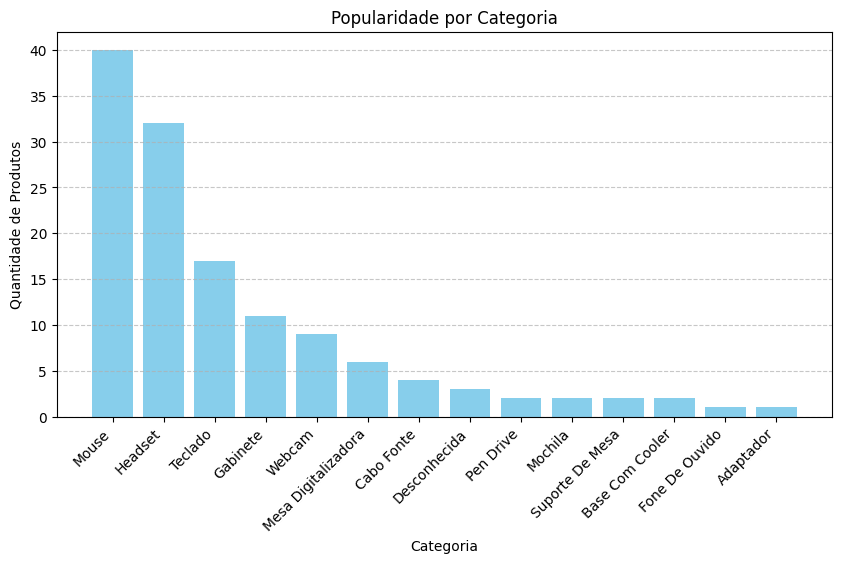

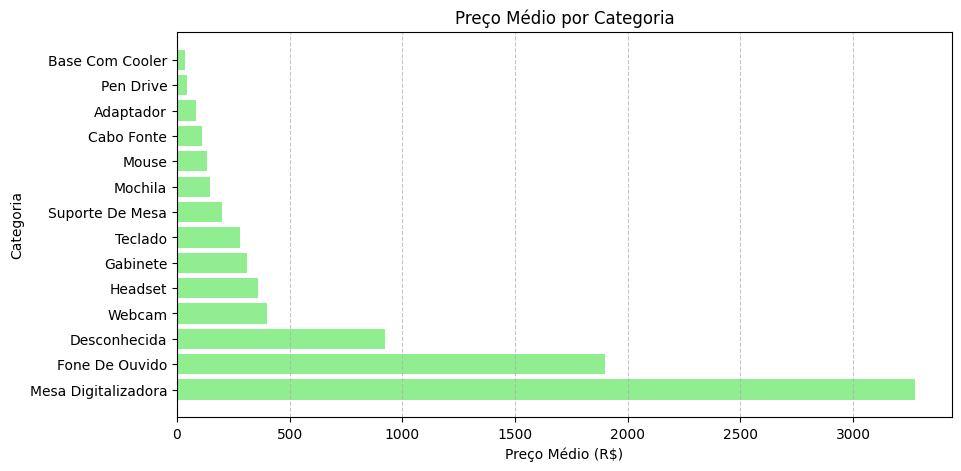

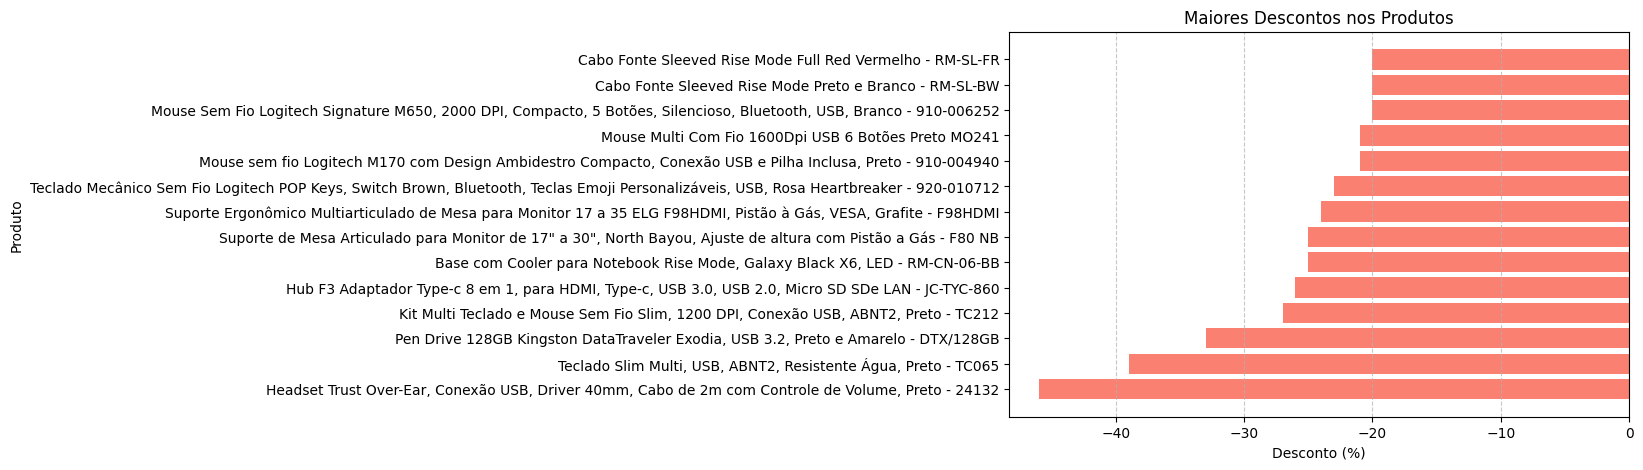

In [179]:


# 1. Gráfico - Popularidade por Categoria
plt.figure(figsize=(10,5))
plt.bar(popularidade_categoria['Categoria'], popularidade_categoria['Quantidade'], color='skyblue')
plt.title('Popularidade por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Produtos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Gráfico - Preço Médio por Categoria
plt.figure(figsize=(10,5))
plt.barh(preco_medio_categoria['Categoria'], preco_medio_categoria['Preco'], color='lightgreen')
plt.title('Preço Médio por Categoria')
plt.xlabel('Preço Médio (R$)')
plt.ylabel('Categoria')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 3. Gráfico - Maiores Descontos
plt.figure(figsize=(8,5))
plt.barh(df_maiores_descontos['Nome'], df_maiores_descontos['Maiores_Descontos'], color='salmon')
plt.title('Maiores Descontos nos Produtos')
plt.xlabel('Desconto (%)')
plt.ylabel('Produto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()